# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('datasets//Data Science Salary 2021 to 2023.csv')
print('Dataset loaded. Shape:', df.shape)

df.head()

Dataset loaded. Shape: (3761, 9)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

1. Total number of unique job titles: 93

2. Average salary for each year:
   work_year  salary_in_usd
0       2020       92302.63
1       2021       94087.21
2       2022      133379.51
3       2023      148954.56

3. Average salary for each experience level:
  experience_level  salary_in_usd
0               EN   78546.284375
1               EX  194930.929825
2               MI  104544.864030
3               SE  153062.468626


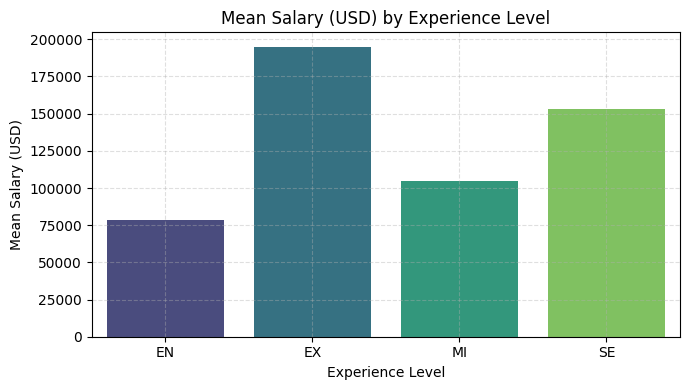

In [13]:
title_count = df['job_title'].nunique()
print(f"1. Total number of unique job titles: {title_count}")

salary_by_year = (
    df.groupby('work_year')['salary_in_usd'].mean().round(2).reset_index()
)
print("\n2. Average salary for each year:")
print(salary_by_year)

salary_by_exp = (
    df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
)
print("\n3. Average salary for each experience level:")
print(salary_by_exp)

plt.figure(figsize=(7, 4))
sns.barplot( data=salary_by_exp,
    x='experience_level',
    y='salary_in_usd',
    hue='experience_level',
    dodge=False,
    palette='viridis'
)
plt.title('Mean Salary (USD) by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [14]:
target = df['salary_in_usd']
features = df[['work_year', 'experience_level']].copy()

encoder = LabelEncoder()
features['exp_level_code'] = encoder.fit_transform(features['experience_level'])
features = features.drop(columns=['experience_level'])

print("Feature sample:")
features.head()


Feature sample:


,work_year,exp_level_code
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


## 📈 Part 4: Train a Linear Regression Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

predicted = regressor.predict(X_test)

print(f"R² Score: {r2_score(y_test, predicted):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predicted)):.2f}")


R² Score: 0.15
RMSE: 59164.82


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [18]:
future_df = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'exp_level_code': [0, 1, 2, 3]
})

forecast_salary = regressor.predict(future_df)

salary_forecast_2024 = pd.DataFrame({
    'Experience_Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Estimated_Salary_2024_USD': forecast_salary
})

salary_forecast_2024


,Experience_Level,Estimated_Salary_2024_USD
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

<h3>1. Does your model make reasonable predictions? Why or why not?<br><br> Yeah, the model makes predictions that make sense since it gives higher salaries to people with more experience. But the R² score is pretty low, which means it’s not super accurate and probably missing some important info.</h3> <h3>2. What are the limitations of using only work_year and experience_level?<br><br> It doesn’t take into account other stuff like job title, company size, or where the job is located. Those things also affect salary, so using just these two features makes the model kind of limited.</h3> <h3>3. How could you improve this model?<br><br> I’d try adding more features like job title or location, use better encoding for the data, and maybe test other models besides linear regression to see if they perform better.</h3> <h3>4. Why is R² not enough to trust your predictions?<br><br> R² only shows how well the model fits the data, not how good it is at predicting. A model can have a high R² but still give bad predictions if it’s missing key variables or if the data isn’t really linear.</h3>

## 📤 Submission Instructions
- Save this notebook as: LastName_FirstName_SalaryPrediction.ipynb
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀